In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [739]:
def load_data() :
    print("Loading Data...")
    df = pd.read_csv('./diamonds.csv')

    # categorical_columns = ['cut', 'color', 'clarity']
    # df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
    
    print(df.columns)

    # removing outliers
    df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0) & (df['x'] * df['y'] * df['z'] <= 820)]
    df = df[df['table'] <= 80]


    print("Loading Complete....")
    return df

df = load_data()


Loading Data...
Index(['S.No', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')
Loading Complete....


In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53916 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.No     53916 non-null  int64  
 1   carat    53916 non-null  float64
 2   cut      53916 non-null  object 
 3   color    53916 non-null  object 
 4   clarity  53916 non-null  object 
 5   depth    53916 non-null  float64
 6   table    53916 non-null  float64
 7   price    53916 non-null  int64  
 8   x        53916 non-null  float64
 9   y        53916 non-null  float64
 10  z        53916 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [741]:
df.describe(include='all')

,S.No,carat,cut,color,clarity,depth,table,price,x,y,z
count,53916.000000,53916.000000,53916,53916,53916,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21547,11284,13062,NaN,NaN,NaN,NaN,NaN,NaN
mean,26971.637714,0.797664,NaN,NaN,NaN,61.749623,57.456243,3930.735088,5.731557,5.733381,3.539384
std,15571.271391,0.473753,NaN,NaN,NaN,1.432267,2.228231,3987.043996,1.119357,1.111227,0.691603
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13486.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40456.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5322.250000,6.540000,6.540000,4.040000


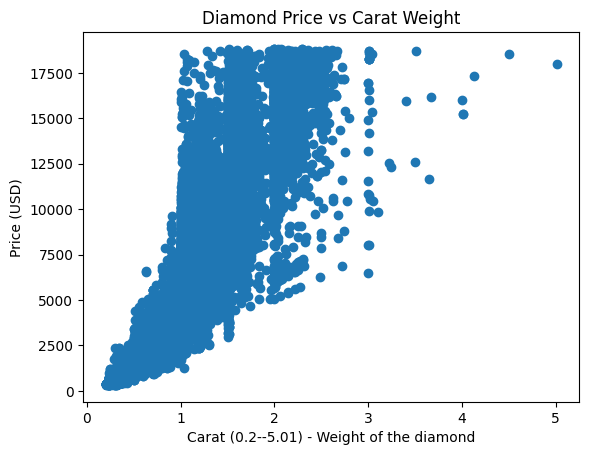

In [742]:
plt.scatter(df['carat'], df['price'])
plt.xlabel('Carat (0.2--5.01) - Weight of the diamond')
plt.ylabel('Price (USD)')

plt.title("Diamond Price vs Carat Weight")
plt.show()


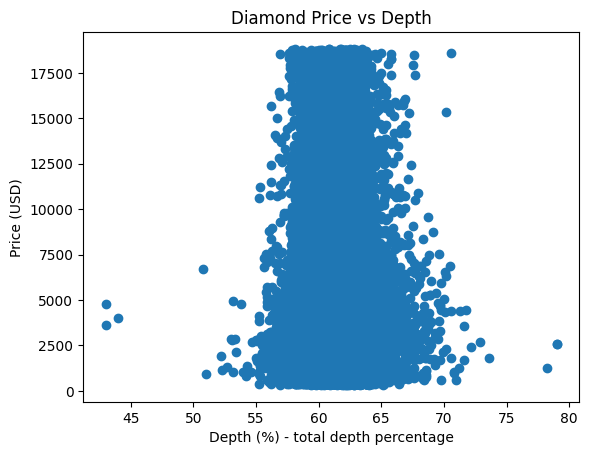

In [743]:
plt.scatter(df['depth'], df['price'])
plt.xlabel('Depth (%) - total depth percentage')
plt.ylabel('Price (USD)')

plt.title("Diamond Price vs Depth")
plt.show()

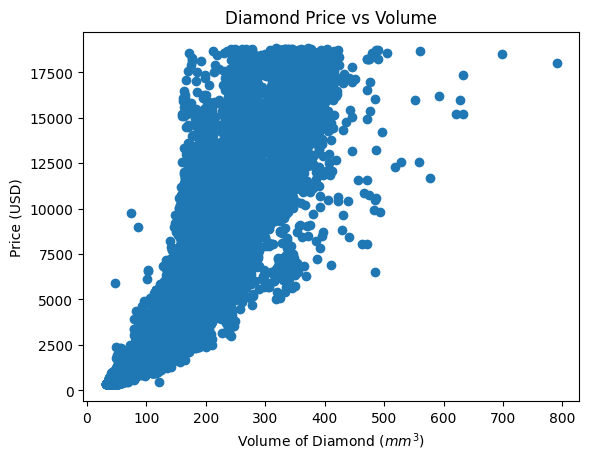

In [744]:
plt.scatter(df['x'] * df['y'] * df['z'], df['price'])
plt.xlabel('Volume of Diamond ($mm^3$)')
plt.ylabel('Price (USD)')

plt.title("Diamond Price vs Volume")
plt.show()

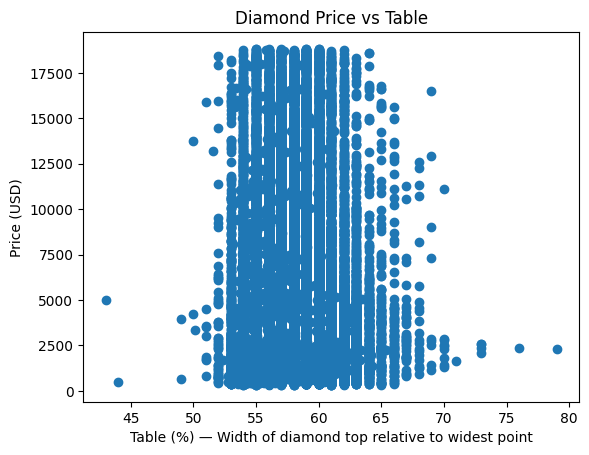

In [745]:
plt.scatter(df['table'], df['price'])
plt.xlabel('Table (%) — Width of diamond top relative to widest point')
plt.ylabel('Price (USD)')

plt.title("Diamond Price vs Table")
plt.show()

In [746]:
def encode(df):
    # one hot encoding
    df = pd.get_dummies(df, drop_first=True, dtype=int)

    # Extract X and y
    y = df['price'].to_numpy()
    x = df.drop(columns=['S.No', 'price']).to_numpy()

    return x, y

x, y = encode(df)

In [747]:
def normalize(x, y):
    x_scaled = np.zeros_like(x, dtype=float)

    features = x.shape[1]
    epsilon = 1e-8
    try:
        for i in range (features):
            x_mean = np.mean(x[:, i])
            x_std = np.std(x[:, i])

            x_scaled[:, i] = (x[:, i] - x_mean) / (x_std + epsilon)
    except :
        print("Error")



    y_mean = np.mean(y)
    y_std = np.std(y)

    y = (y - y_mean) / y_std

    # Add the bias column (ones) back after scaling
    x_scaled = np.hstack([np.ones((x.shape[0], 1)), x_scaled])
    print(x_scaled)


    
    print("Feature scaling done.")
    return x_scaled, y, y_mean, y_std

x, y, y_mean, y_std = normalize(x, y)


[[ 1.         -1.19824026 -0.17428715 ... -0.54233655 -0.26962762
  -0.32203294]
 [ 1.         -1.24045678 -1.36122738 ... -0.54233655 -0.26962762
  -0.32203294]
 [ 1.         -1.19824026 -3.38600776 ... -0.54233655 -0.26962762
  -0.32203294]
 ...
 [ 1.         -0.20615202  0.73337302 ... -0.54233655 -0.26962762
  -0.32203294]
 [ 1.          0.13158015 -0.52338722 ... -0.54233655 -0.26962762
  -0.32203294]
 [ 1.         -0.10061072  0.31445294 ... -0.54233655 -0.26962762
  -0.32203294]]
Feature scaling done.


In [748]:
epochs = 200
learning_rate = 0.0009
lambda_parameter = 0.001
degree = 3

beta1 = 0.9
beta2 = 0.98
epsilon = 1e-8

print('Variables initialised')

Variables initialised


In [749]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_features(X, degree):
    poly = PolynomialFeatures(degree, include_bias=False, interaction_only=True)
    

    x_poly = poly.fit_transform(X)

    print(f"Before : {x.shape}")
    print(f"After : {x_poly.shape}")

    return x_poly

    # samples, features = X.shape
    # poly_features = [np.ones((samples, 1))]

    # # print(poly_features)

    # for power in range(1, degree + 1):
    #     poly_features.append(X ** power)

    # print(np.hstack(poly_features))
    # return np.hstack(poly_features)

x = polynomial_features(x, degree)

Before : (53916, 24)
After : (53916, 2324)


In [750]:
no_of_features = x.shape[1]
W = np.random.rand(no_of_features) * 0.01

print("Weights initialised : ")
print(W.shape)

Weights initialised : 
(2324,)


In [751]:
def split_data(x, y):
    tot_rows = x.shape[0]
    indices = np.random.choice(tot_rows, size=int(0.8 * tot_rows), replace=False)

    x_train = x[indices]
    y_train = y[indices]

    x_test = np.delete(x, indices, axis=0)
    y_test = np.delete(y, indices, axis=0)

    print('Data split for training and testing')

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = split_data(x, y)


Data split for training and testing


In [752]:
def compute_error(pred_y, y_train):
    error_vector = np.subtract(pred_y, y_train)
    error_vector = np.square(error_vector)

    mean_error = np.mean(error_vector)
    return mean_error

In [753]:
def model(W, X):
    pred_y = np.dot(X, W)
    
    return pred_y

In [754]:
def adam_optimiser(W, x_train, y_train, epochs, beta1, beta2, epsilon, learning_rate, lambda_parameter, k_fold_error_vector):
    # print("Running ADAM : ")


    m = np.zeros_like(W)
    v = np.zeros_like(W)

    error_over_time = []

    for i in range (1, epochs + 1):
        pred_y = model(W, x_train)

        mean_error = compute_error(pred_y, y_train)
        error_over_time.append(mean_error)

        gradient = (2 / x_train.shape[0]) * np.dot(x_train.T, (pred_y - y_train)) + (2 * lambda_parameter * W)

        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)

        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)

        W = W - learning_rate * (m_hat / (np.sqrt(v_hat) + epsilon))

        # if (i % 50 == 0 or i == 1 or i == epochs):
        #     print(f'epoch : {i}')

    k_fold_error_vector += np.array(error_over_time)

    return W, k_fold_error_vector

# W, error_over_time = adam_optimiser(W, x_train, y_train, epochs, beta1, beta2, epsilon, learning_rate, lambda_parameter)

In [755]:
def gradient_descent(W, x_train, y_train, epochs, learning_rate):
    print("Running gradient descent : ")
    error_over_time = []

    for i in range (epochs):
        pred_y = model(W, x_train)

        mean_error = compute_error(pred_y, y_train)
        error_over_time.append(mean_error)

        gradient = (2 / x_train.shape[0]) * np.dot(x_train.T, (pred_y - y_train))

        # print(gradient.shape)
        # print(gradient)

        W = W - learning_rate * gradient

        if (i % 100 == 0 or i == epochs - 1):
            print(f'epoch : {i}')

    return W, error_over_time

# W, error_over_time = gradient_descent(W, x_train, y_train, epochs, learning_rate)
    

In [756]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test_accuracy(W, x_test, y_test):
    # pred_y = model(W, x_test)

    pred_y_norm = model(W, x_test)
    
    # Denormalize predictions
    pred_y = pred_y_norm * y_std + y_mean
    y_test = y_test * y_std + y_mean

    mse = mean_squared_error(y_test, pred_y)
    mae = mean_absolute_error(y_test, pred_y)
    r2 = r2_score(y_test, pred_y)

    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Error : {mae}")
    print(f"R2 Score : {r2}")
    
# test_accuracy(W, x_test, y_test)

In [757]:
from sklearn.model_selection import KFold

def cross_validation_testing(x, y, k=5):
    print(f"\nRunning {k}-Fold Cross-Validation...\n")
    
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    mse_list = []
    mae_list = []
    r2_list = []

    k_fold_error_vector = np.zeros(epochs)

    fold = 1

    for train_index, test_index in kf.split(x):
        print(f"Fold {fold}:")

        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Re-initialize weights for each fold
        W_fold = np.random.rand(x.shape[1]) * 0.01

        # Train with ADAM
        W_fold, k_fold_error_vector = adam_optimiser(W_fold, x_train, y_train, epochs, beta1, beta2, epsilon, learning_rate, lambda_parameter, k_fold_error_vector)

        # Predict
        pred_y_norm = model(W_fold, x_test)

        # Denormalize
        pred_y = pred_y_norm * y_std + y_mean
        y_true = y_test * y_std + y_mean

        # Evaluate
        mse = mean_squared_error(y_true, pred_y)
        mae = mean_absolute_error(y_true, pred_y)
        r2 = r2_score(y_true, pred_y)

        print(f"  MSE: {mse:.2f} | MAE: {mae:.2f} | R²: {r2:.4f}\n")

        mse_list.append(mse)
        mae_list.append(mae)
        r2_list.append(r2)

        fold += 1

    k_fold_error_vector /= k

    print("Average across folds:")
    print(f"  Mean MSE : {np.mean(mse_list):.2f}")
    print(f"  Mean MAE : {np.mean(mae_list):.2f}")
    print(f"  Mean R²  : {np.mean(r2_list):.4f}")

    return k_fold_error_vector

k_fold_error_vector = cross_validation_testing(x, y, k=5)



Running 5-Fold Cross-Validation...

Fold 1:
  MSE: 361888.05 | MAE: 340.11 | R²: 0.9768

Fold 2:
  MSE: 425938.20 | MAE: 353.86 | R²: 0.9731

Fold 3:
  MSE: 424372.28 | MAE: 354.41 | R²: 0.9735

Fold 4:
  MSE: 402161.65 | MAE: 356.68 | R²: 0.9752

Fold 5:
  MSE: 416916.27 | MAE: 355.26 | R²: 0.9736

Average across folds:
  Mean MSE : 406255.29
  Mean MAE : 352.06
  Mean R²  : 0.9744


Plotting Error :


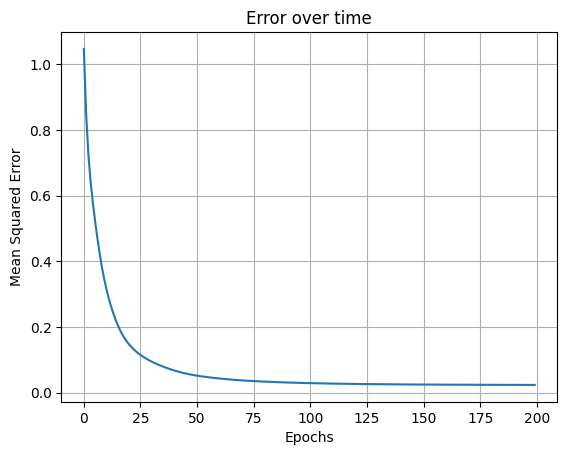

In [758]:
def plot_error(k_fold_error_vector):
    print("Plotting Error :")
    x_axis = np.arange(epochs)
    y_axis = k_fold_error_vector

    plt.plot(x_axis, y_axis)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("Error over time")
    plt.grid(True)
    
    plt.show()

plot_error(k_fold_error_vector)

In [759]:
import pickle

def save_data():
    model_data = {
        'weights': W
    }

    with open('diamond_prediction.pkl', 'wb') as f:
        pickle.dump(model_data, f)
    
    print("Model saved successfully.")

save_data()

Model saved successfully.
